# Biofludics Senssing Lab 3

So far, we've covered microfabrication and data acquisition. In this lab, we will focus on how to extract meaningful information from bioimage data. To extract information from each cell, we will first apply noise filtering and then perform segmentation. Afterward, we will extract statistical parameters such as cell count and morphological features, including size and color. Due to time constraints, we will use classical image processing techniques for segmentation and information extraction. Finally, we will explore how the extracted data can be used for more advanced analysis using simple machine learning algorithms like K-means and Gaussian Mixture Models (GMM), using the popular scikit-learn library. Don't be intimidated by terms like ML, K-means, and GMM. This lab is designed for beginners and will guide you through each step. 



### Table of Contents
1. [Introduction to Bioimage Data and Microfabrication](01_Introduction_to_Bioimage_Data_and_Microfabrication.ipynb)
2. [Data Acquisition with Microfluidics](02_Data_Acquisition_with_Microfluidics.ipynb)
3. [Noise Filtering and Segmentation](03_Noise_Filtering_and_Segmentation.ipynb)
4. [Statistical Analysis of Cell Count and Morphological Features](04_Statistical_Analysis_of_Cell_Count_and_Morphological_Features.ipynb)
5. [Classical Image Processing Techniques for Segmentation and Information Extraction](05_Classical_Image_Processing_Techniques.ipynb)
6. [Simple Machine Learning Algorithms: K-means and Gaussian Mixture Models](06_Simple_Machine_Learning_Algorithms.ipynb)

### Additional resources : 
This script contains all the information needed for this lab but feel free to explore following resources:
- Tutorial: [Image processing tutorial skimage](https://www.kaggle.com/code/bextuychiev/full-tutorial-on-image-processing-in-skimage)
- Book: [Microscope image processing](https://shop.elsevier.com/books/microscope-image-processing/merchant/978-0-12-821049-9)

In [2]:
# import all the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

from skimage.io import imread, imshow
from skimage import filters as skf
from skimage.color import rgb2gray 
from skimage import measure

from func.utils import generate_data, plot_image, plot_histogram, rgb_to_gray, gmm_clustering



# Bioimage Segmentation
- We will use sk-image for the segmentation and image processing
    - read and show the image files
    - examine the each channel in the rgb image
    - convert the image to grayscale 
    - perform noise filtering using Gaussian filter
    - plot histograms to decide the threshold for binary thresholding
    - perform binary thresholding




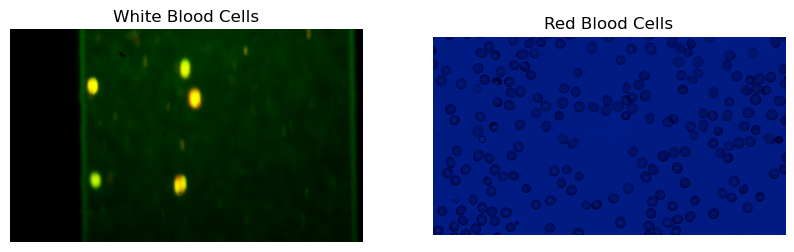

In [23]:
# read images using skimage 

# YOUR CODE START HERE
rbc_img = imread('data/rbc_abs.png') # read rbc image at path: 'data/rbc_abs.png'
wbc_img = imread('data/wbc_data.png') # read wbc image at path: 'data/wbc_data.png'
# YOUR CODE END HERE

#plot raw image
fig, ax = plt.subplots(ncols=2, figsize=[10, 10])
plot_image(ax[0], wbc_img, "White Blood Cells")
plot_image(ax[1], rbc_img, "Red Blood Cells")
plt.show()


## Examining image channels
Prefect, you have the most common task for any image processing algorithm which reading an diplaying image! 
Another common task is to detemine the channels of interest ie the channel which contains information of your cells. To do this best way is to looking sapetely at each channel. 

#### Task 
- Split the image into its red, green, and blue channels
- Plot each channel separately
- Determine which channels have cell information


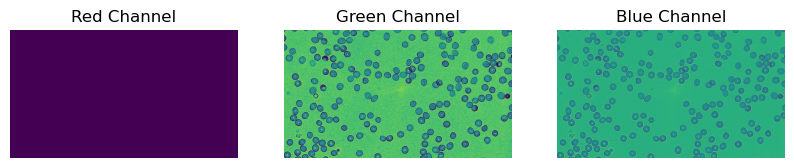

In [24]:
# spliting rbc image into its rgb conponent
rbc_r = rbc_img[:,:,0]
rbc_g = rbc_img[:,:,1]
rbc_b = rbc_img[:,:,2]

fig, ax = plt.subplots(ncols=3, figsize=[10, 10])
plot_image(ax[0], rbc_r, "Red Channel")
plot_image(ax[1], rbc_g, "Green Channel")
plot_image(ax[2], rbc_b, "Blue Channel") 
plt.show()


# spliting wbc image into its rgb conponent and plot it
#YOUR CODE START HERE
# approximately 7 lines of code
wbc_r = np.nan # replace np.nan with you code
wbc_g = np.nan # replace np.nan with you code
wbc_b = np.nan # replace np.nan with you code

# plot the image 


#YOUR CODE END HERE 
plt.show()

<details>
  <summary>Click to see hint</summary>

  To split the image into its RGB components, you can use the numpy slicing feature. 
  Splitting of rbc image can uses as example


  
</details>

### Grayscale image and histogram 
- **Why Grayscale?** 
    - **Simplification**: Grayscale images simplify the process by focusing only on intensity, without dealing with separate color channels (like RGB). 
    - **Noise Filtering**: I it simplifies the process of filtering on only once instead of doing it for each color channel.
    Ultimately, this can speed up processing and reduce computational complexity.

- **Why visualize the histogram?**:

    - **Thresholding**: By looking at the histogram, you can get an idea of the intensity distribution and decide on an appropriate threshold for tasks like noise filtering or segmentation.

### Task: 
** Note**: For simplicity we will only use WBC image for further processing. But ofcourse, you can do the processing of RBC image as non mandatory task
- Convert the rgb images to grayscale using the `rgb_to_gray` function
- Apply a Gaussian filter to the grayscale images to reduce noise. Use `skf.gaussian()` 
- Plot the unfiltered and filtered grayscale images
- Use `plot_histogram()`function to plot the histogram 
- Do you notice and change after filtering in the histogram ?

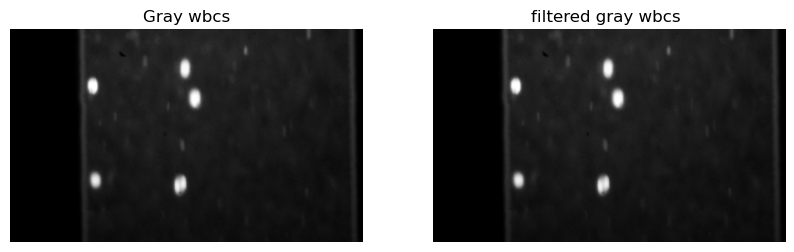

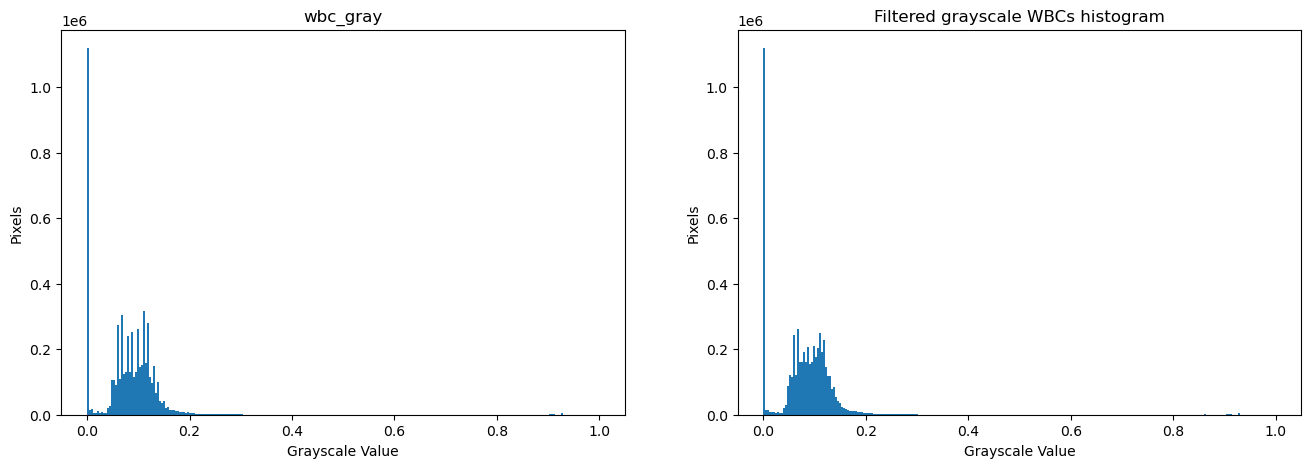

In [25]:
sigma = 0.8

# Convert image to grayscale and filter it using gaussian filter
#YOUR CODE START  HERE
# approximately 2 lines of code
wbc_gray = rgb_to_gray(wbc_img) # conver the image to grayscale
wbc_filt = skf.gaussian(wbc_gray,sigma=sigma) # apply gaussian filter to the gray scale image
# YOUR CODE END  HERE

# plot gray image
fig, ax = plt.subplots(ncols=2, figsize=[10, 10])
plot_image(ax[0], wbc_gray, "Gray wbcs", is_gray=True)
plot_image(ax[1], wbc_filt, "filtered gray wbcs ", is_gray=True)
plt.show()


# plot histogram of filtered and unfiltered gray image 
fig, ax = plt.subplots(ncols=2, figsize=[16, 5])
#YOUR CODE START HERE
# approximately 2 lines of code
plot_histogram(ax[1],wbc_filt, title="Filtered grayscale WBCs histogram")
plot_histogram(ax[0],wbc_gray,"wbc_gray")

# YOUR CODE END HERE
plt.show()


<details>
  <summary>Click to see hint</summary>
  
  - Use `rgb_to_gray(img)` method from utils
  - Use `skf.gaussian(gray_img, sigma)` method from skimage.filters
  - Use `plot_histogram(gray_img, title)` method from utils


  
</details>

### Image binerization 
Image binerization is the process of converting the image pixels into a black or white based on a threshold value. The simplest form of the thesholding just select a pixel intesity and assign 0 to all the pixel below it or maximum (255 or 1) to all the pixcel above it. However, the microscopic image are subjected to many parameters change such as uneven lighting change in exposure different gain setting therefore it could be challenging to do threshoding based on one value. Fortunately, skimage provide many different way to do the thresholding so you can choose the best mathod that works for your image. [see thresholding method here](https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding_guide.html)

#### Task
- Find a most suitable thresholding method to binarize the image
- Make the image binary and plot plot it
- Decide your region of interest (ROI) is in white pixels or black pixels Hint: Often its good idea to have ROI in white pixels



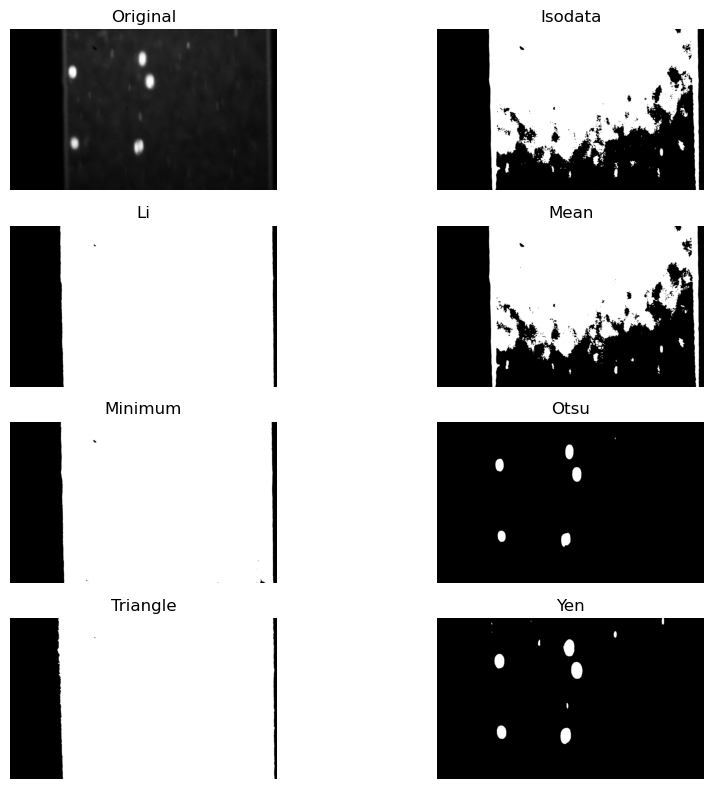

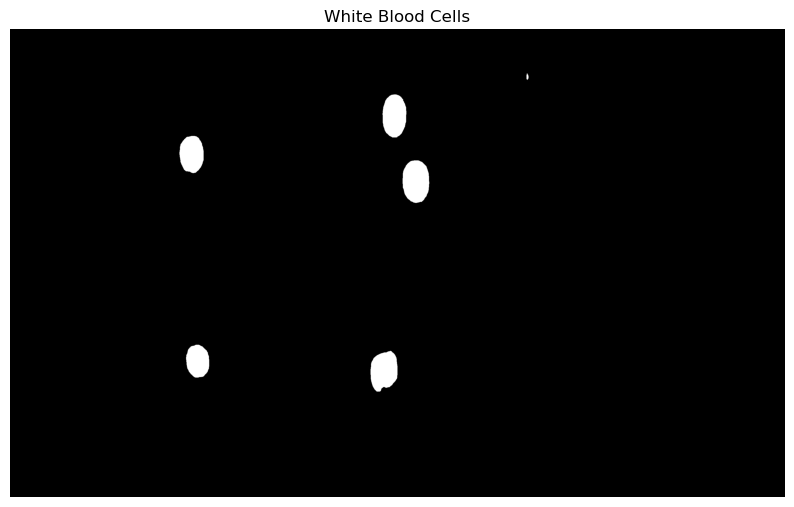

In [26]:
fig, ax = skf.try_all_threshold(wbc_filt, figsize=(10, 8), verbose=False)

plt.show()

# YOUR CODE START HERE
wbc_thres = skf.threshold_otsu(wbc_gray)
wbc_bin = wbc_gray > wbc_thres

# YOUR CODE END HERE 


# plot the binary image
fig, ax = plt.subplots(ncols=1, figsize=[10, 10])
plot_image(ax, wbc_bin, "White Blood Cells", is_gray=True)




<details>
  <summary>Click to see hint</summary>
  
  - Use `try_all_threshold()` method from sk-image and check which method gives less granular noise. 
  - Find global threshold  value 
  - Use the global threshold value to binarize the image.
  

  <figure style="text-align: center;">
    <img src="data/doc_image/wbc_bin.png" width="400" height="400">
    <figcaption>Our output should look something like this </figcaption>
</figure>


  
</details>


# Cell detection and Extract statistical and mhorphology information
- Use the binary image to detect the cells 
- Use `measure.label` function from sk-image to get the labels for each cell
- Use `measure.regionprops` function from sk-image to get the properties of each cell (like area, perimeter, centroid, etc.)
- Save the information in a csv

In [27]:

# Complete the function here

def find_and_draw_contours(ax, bin_image, cnt_thes=0.7):
    """
    Find the contours in the image
    parameter:
        ax: axis for drawing contours
        bin_image: binary image
        cnt_thes(float): pixels for contours detection (default = 0.7)
    return: list of contours
    """

    # YOUR STARTS HERE 

    contours = measure.find_contours(bin_image, cnt_thes)
    # YOUR ENDS HERE

    ax.imshow(bin_image, cmap=plt.cm.gray)

    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])
    
    return contours 



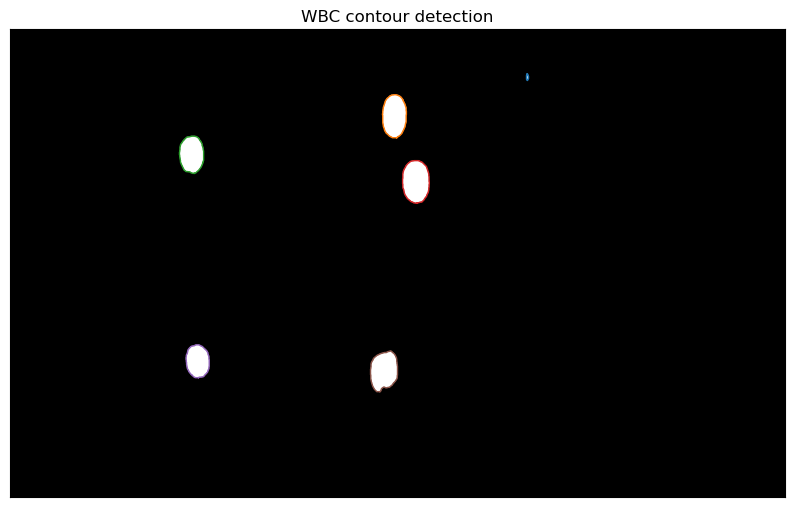

In [28]:
# now find and draw contours in wbc image 

fig, ax = plt.subplots(ncols=1, figsize=[10, 10])
#YOUR CODE STARS HERE
wbc_cnt_thres = 0.5 # thereshold for the wbc contour detection
wbc_contours = find_and_draw_contours(ax, wbc_bin, wbc_cnt_thres) # use find_and_draw_contours() function 
#YOUR CODE ENDS HERE

ax.set_title('WBC contour detection')
plt.show()

### Morphological and statistical analysis of WBCs

#### Task
- Calculate the area, perimeter, and centroid of each cell using method 'area`, `perimeter`, and `centroid`respectively from `regionprops` [see documentation](https://scikit-image.org/docs/0.24.x/api/skimage.measure.html#skimage.measure.regionprops)
- Use `coords`method from `regionprops to obtain the rows and columns of the each cells 
- Use obtained rows and columns to obtain the pixels intesity inside the cell for each channel. Hint `channel[x_coords, y_coords]`
- Use np.mean() to calculate the average intensity


In [ ]:
# TODO: DETETE  the following 
wbc_r = wbc_img[:, :, 0]  # Red channel (2D array)
wbc_g = wbc_img[:, :, 1]  # Green channel (2D array)
wbc_b = wbc_img[:, :, 2]  # Blue channel (2D array)


# now measure the properties of the cells 
# YOUR CODE START HERE
wbc_props = measure.regionprops(measure.label(wbc_bin), intensity_image=wbc_gray) # Calculate properties of the cells
for i, prop in enumerate(wbc_props):

    cell_area= prop.area # ca
    cell_perimeter = prop.perimeter # 
    cell_centroid = prop.centroid # 
    x_coord = prop.coords[:, 1]  # get all coordinates of columns inside cell
    y_coord = prop.coords[:, 0]  # get all coordinate of the rows inside the cell 

    # extract the pixel intensity inside the cell for each channel
    r_pixels = wbc_r[x_coord, y_coord] # get all red pixels in the cell
    g_pixels= wbc_g[x_coord, y_coord] # get all green pixels in the cell
    b_pixels = wbc_b[x_coord, y_coord] # get all blue pixels in the cell

    # Calculate average RGB intensity inside the cell for each channel
    avg_red_intensity = np.mean(r_pixels)  # mean intensity red channel
    avg_green_intensity = np.mean(g_pixels)  # mean intensity green channel
    avg_blue_intensity = np.mean(b_pixels)  # mean intensity blue channel
    # YOUR CODE END HERE
    print(f'Cell {i+1}: Area = {cell_area}, Perimeter = {cell_perimeter}, Centroid = {cell_centroid}, Average RGB Intensity = {avg_red_intensity:.2f}, {avg_green_intensity:.2f}, {avg_blue_intensity:.2f}')

  

Cell 1: Area = 155.0, Perimeter = 55.17766952966369, Centroid = (np.float64(187.14193548387098), np.float64(2033.1548387096775)), Average RGB Intensity = 108.83, 110.58, 3.33
Cell 2: Area = 12817.0, Perimeter = 449.01933598375615, Centroid = (np.float64(340.4929390653039), np.float64(1510.433174689865)), Average RGB Intensity = 166.23, 207.52, 0.15
Cell 3: Area = 11148.0, Perimeter = 409.7056274847714, Centroid = (np.float64(491.3791711517761), np.float64(713.7137603157518)), Average RGB Intensity = 207.87, 208.47, 0.15
Cell 4: Area = 14309.0, Perimeter = 462.6761902332486, Centroid = (np.float64(597.9367530924593), np.float64(1595.0497588930043)), Average RGB Intensity = 217.38, 195.68, 0.00
Cell 5: Area = 9428.0, Perimeter = 371.56349186104046, Centroid = (np.float64(1304.0547305897328), np.float64(737.3888417479848)), Average RGB Intensity = 135.62, 194.75, 0.07
Cell 6: Area = 13213.0, Perimeter = 457.5046173579947, Centroid = (np.float64(1341.65692878226), np.float64(1469.232422614

### Hurray! you successfully done the image processing
Now we several data related to the cell such area, perimeter, location of the cells, and intensity values etc. If you want you can save it into a csv file.



### What can you do with this data?

- Use this data to answer scientific questions
- Use this data to predict the outcome of future experiments
- Use this data to build a predictive model for the cells
- Use this data to design a new diagnostic tool for the cells
- Use this data to create a new treatment for the cells
- Use this data to create a new therapy for the cells
- Use this data to perform machine learning tasks such as classification, regression, clustering etc.

and many more things can be done based on the available data. In this lab as we focused on WBCs which essentially 5 sub classes. They are quite important in the many diagnostic [read more here](https://en.wikipedia.org/wiki/Complete_blood_count). When we are use AO we limited to 3 differential of the WBCs. In the next section of this sciript will see how the obtained data from the image processing could be used to categorize the cells in different categories using simple machine learning techniques such as K-means and compare it with advance thechnique such ad Gaussian mixture model. However, due limited we can not process good amounts of cells data therefore i will provide you with a simulated data data stored in csv file for further analysis. 

In [ ]:
# TODO: Delete this cell 
# # n_sample = 10000d
# centers = [(35,100), (45,88), (80,75)]
# cluster_std = [3,1, 9]
# noise_fraction = 0.01
# n_features = 2

# data = generate_data(n_sample, n_features,centers, cluster_std, noise_fraction)

# np.savetxt('data/sim_data.csv', data, delimiter=',', header=','.join(['avg_r', 'avg_g']), fmt='%.2f')


# Data exploration and filtering
- Load the csv data from the data directory using pandas 
- Print first 5 data set notice the header is everything valid? 
- Create a scatter plot using matplolib/seaborn to visualize the data.
    - Check if all the data set is in valid range pixels intensity $(0-255)$
    - Remove any invalid pixels values from the data 


In [4]:
names =['avg_r', 'avg_g']
delimiter=','
skiprows= 1

#load data
#YOUR CODE START HERE
# roughly 2 lines of code
df = pd.read_csv('data/sim_data.csv', names=names, delimiter=delimiter, skiprows=skiprows)
df.head(5)
#YOUR CODE END HERE



,avg_r,avg_g
0,35.56,101.18
1,35.16,95.45
2,29.07,100.09
3,41.46,97.85
4,39.17,99.69


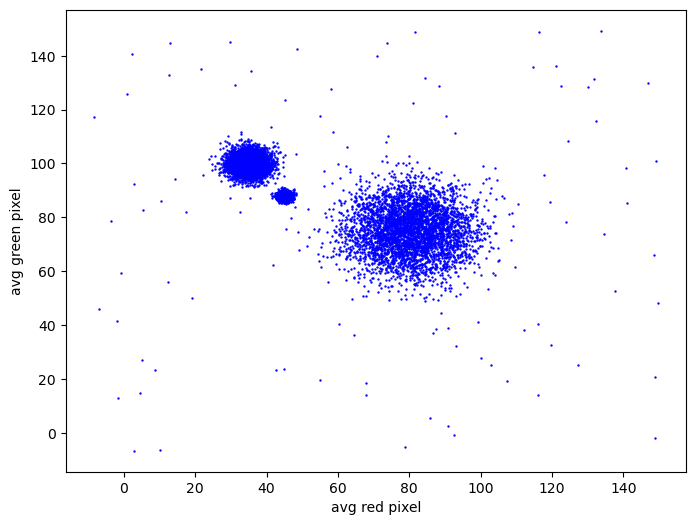

In [5]:
# Creat scater plot of the data
#YOUR CODE START HERE
# roughly 4 lines of code
plt.figure(figsize=(8, 6))
plt.scatter(df.avg_r, df.avg_g, c='blue', marker='o', s=.5)
plt.xlabel("avg red pixel")
plt.ylabel("avg green pixel")
#YOUR CODE END HERE


plt.show()


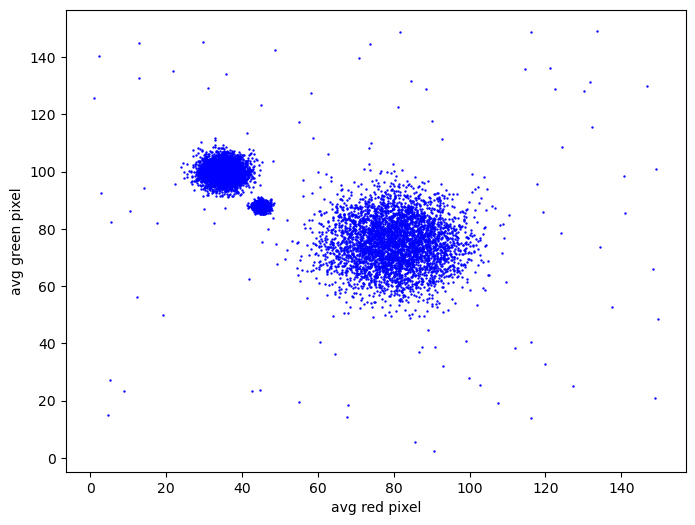

In [6]:
# perform filtering of the invalid data values
filt_df= pd.DataFrame() # initialize empty data frame to store filtered data 

#YOUR CODE START HERE
# filter the data
# roughly 2 lines of code
filt_df['avg_g']=  df.avg_g[(df.avg_g > 0) & (df.avg_g < 256)] # logic for filtering 'avg_g' colum
filt_df['avg_r']=  df.avg_r[(df.avg_r > 0) & (df.avg_r < 256)] # logic for filtering 'avg_r' colum
#YOUR CODE END HERE

# Creat scater plot to varifiy the filtering process
plt.figure(figsize=(8, 6))
plt.scatter(filt_df.avg_r, filt_df.avg_g, c='blue', marker='o', s=.5)
plt.xlabel("avg red pixel")
plt.ylabel("avg green pixel")
plt.show()

<details>
  <summary>Click to see hint</summary>

To finter 'avg_g' use something like this:
`filt_df['avg_g'] = df.avg_g[(df.avg_g > -10) & (df.avg_g < 200)]`


  
</details>

# Cell type differentiation based on the pixcel intesity
In Acridine Orange staining, when it binds to DNA, it gives rise to green fluorescence, and when it binds to RNA, it gives rise to red fluorescence. Different types of white blood cells (WBCs) are known to have varying amounts of DNA and RNA, as shown in Figure 1. Therefore, one way to differentiate between subtypes of WBCs is by clustering them based on their red and green pixel intensities. 


<figure style="text-align: center;">
    <img src="data/doc_image/wbc_img.png" width="400" height="400">
    <figcaption>Figure 1: Acridine Orange Staining of White Blood Cells (WBCs)[stark et.al]</figcaption>
</figure>

In the following code section we will explore a k-means clustering algorithm for the diffrentiation of WBCs.
**Task for the k-means clustering**
- Use scikit-learn to perform the k-means clustering [read more here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Determine the numbed of cells in each cluster
- Visualize the clusters using matplotlib/seaborn  
- Can you tell roughly which cluster belong to which subtype of WBC?



In [7]:
filt_df = filt_df.dropna() # remove invalid data

# perform the k-means clustering
#YOUR CODE START HERE
# approximately 2 lines of code
kmeans = KMeans(n_clusters=3, random_state=42)
filt_df['Cluster'] = kmeans.fit_predict(filt_df[['avg_r','avg_g']])

#YOUR CODE END HERE



<details>
  <summary>Click to see hint</summary>
  
  Use `fit_predict` method to perform the k-means clustering


  
</details>




In [8]:
# determine number of cell in each cluster

#YOUR CODE START HERE
# roughly 2 lines of code
count = filt_df['Cluster'].value_counts()

#YOUR CODE END HERE
print(count)



Cluster
0    4011
1    3969
2    2109
Name: count, dtype: int64


<details>
  <summary>Click to see hint</summary>
  
  Use pandas method `value_counts()` 

</details>

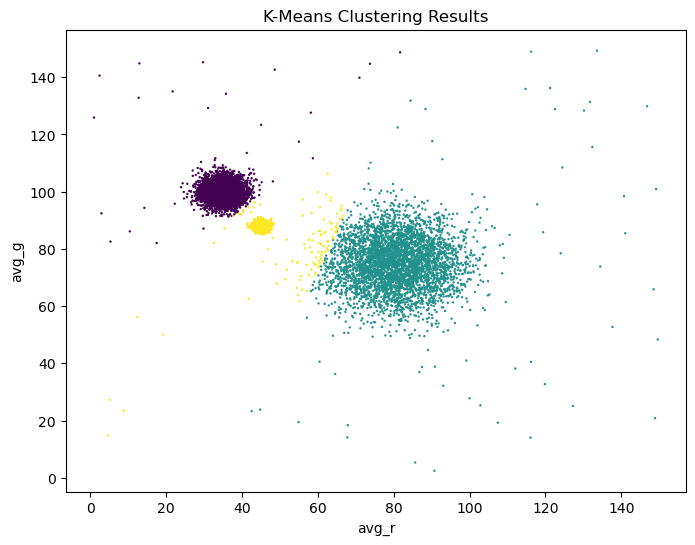

In [ ]:
# finally plot the cluster

plt.figure(figsize=(8, 6))
plt.scatter(filt_df['avg_r'], filt_df['avg_g'], c=filt_df['Cluster'], marker='o', s=0.5)
plt.xlabel('avg_r')
plt.ylabel('avg_g')
plt.title('K-Means Clustering Results')
plt.colorbar().remove()
plt.show()

### OPTIONAL: Result from the gaussian mixture model
**NOTE:** It is just for the comparison purposes you dont need perform this method 


| Cluster | Number of cells |
|-------|-------|
|   0   |  4002 |
|   1   |  4087 |
|   2   |  2000 |


<figure style="text-align: left;">
    <img src="data/doc_image/gmm_cluster.png" width="800" height="400">
    <figcaption>out of GMM clustering</figcaption>
</figure>

### Your thaught:
- What do you think which method performed well k-means or GMM ? 


# Congratulations! You have successfully completed the lab 



# OPTIONAL: 

Text(0.5, 1.0, 'RBC contour detection')

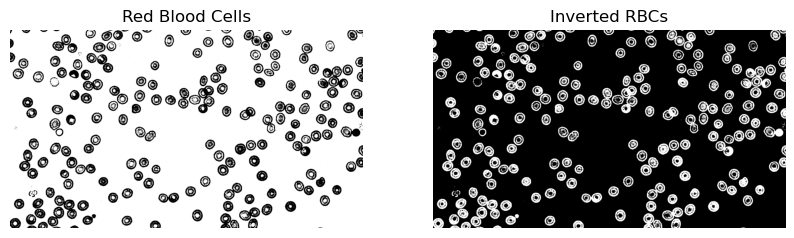

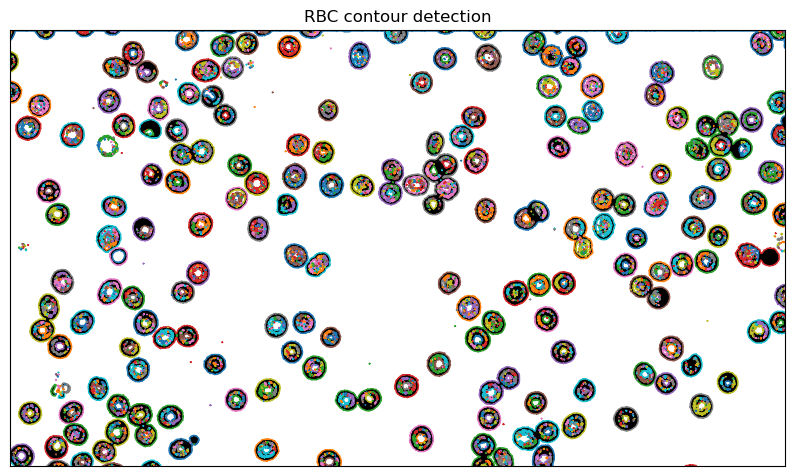

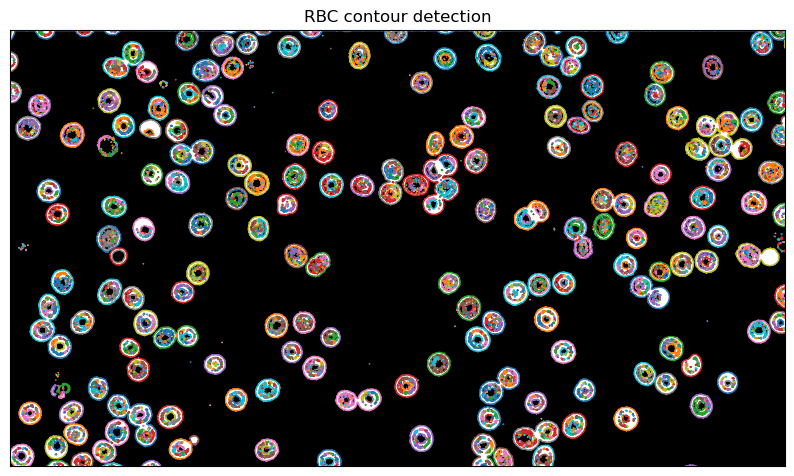

In [59]:
fig, ax = plt.subplots(ncols=2, figsize=[10, 10])
rbc_thes = skf.threshold_otsu(rbc_gray)
rbc_bin = rbc_gray > rbc_thes
plot_image(ax[0], rbc_bin, "Red Blood Cells", is_gray=True)
plot_image(ax[1], 1-rbc_bin, "Inverted RBCs",is_gray=True)

rbc_cnt_thres = 0.8  # threshold for the rbc contour detection
fig, ax = plt.subplots(ncols=1, figsize=[10, 10])
rbc_contours = find_and_draw_contours(ax, rbc_bin, rbc_cnt_thres)
ax.set_title('RBC contour detection')

rbc_cnt_thres = 0.8  # threshold for the rbc contour detection
fig, ax = plt.subplots(ncols=1, figsize=[10, 10])
rbc_contours = find_and_draw_contours(ax, 1-rbc_bin, rbc_cnt_thres)
ax.set_title('RBC contour detection')